In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from random import random, shuffle
import numpy as np
import torch

In [2]:
def accuracy(X, y):
    correct = 0
    for i in range(len(y)):
        y_predicted = int(np.sign((torch.dot(w, torch.Tensor(X[i])) - b).detach().numpy()[0]))
        if y_predicted == y[i]: correct += 1
    return float(correct)/len(y)


def line_func(x, offset):
    return   -1 * (offset - b.detach().numpy()[0] + w.detach().numpy()[0] * x ) / w.detach().numpy()[1]


In [3]:
iris = load_iris()

In [4]:
X = [[x[2], x[3]] for x in iris.data]
Y = iris.target.copy()

for i in range(len(Y)):
    if Y[i] == 0:
        Y[i] = 1
    else:
        Y[i] = -1

x_train, x_test, y_train ,y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Torach trainer

dim = len(X[0])

# Set up weights and bias for SVM model
w = torch.autograd.Variable(torch.rand(dim), requires_grad = True)
b = torch.autograd.Variable(torch.rand(1), requires_grad=True)

step_size = 1e-3
num_epochs = 5000
minibatch_size = 20

In [7]:
# Training svm

for epoch in range(num_epochs):
    # Create indeices 
    inds = [i for i in range(len(x_train))]
    shuffle(inds)
    for i in range(len(inds)):
        L = max(0, 1 - y_train[inds[i]] * (torch.dot(w, torch.Tensor(x_train[inds[i]])) - b))**2
        if L != 0:
            L.backward() # Backprop L to adjust the weights
            w.data -= step_size * w.grad.data
            b.data -= step_size * b.grad.data
            
            w.grad.data.zero_()
            b.grad.data.zero_()
print('plane equation:  w=', w.detach().numpy(), 'b =', b.detach().numpy()[0])  



print('train accuracy', accuracy(x_train, y_train))
print('test accuracy', accuracy(x_test, y_test))

plane equation:  w= [-0.98636067 -0.8315162 ] b = -3.0886688
train accuracy 1.0
test accuracy 1.0


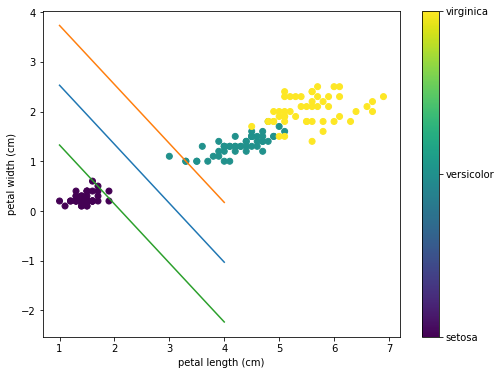

In [8]:
x = np.array(range(1, 5))
ym = line_func(x,  0)
yp = line_func(x,  1)
yn = line_func(x, -1)

x_index = 2
y_index = 3
plt.figure(figsize=(8, 6))
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.plot(x, ym)
plt.plot(x, yp)
plt.plot(x, yn)